# **FAKE NEWS**
### *DSB08RT_grupo_3_proyecto_2*

![WordCloud](portada.png)

### Motivaciones del proyecto

El proyecto consiste en el Análisis de Fake News empleando como fuente de datos uno o varios datasets disponibles en la red. El motivo de la selección de esta temática es el impacto significativo que pueden tener las Fake News en la sociedad, distorsionando la percepción de la realidad y afectando la toma de decisiones informadas. El término empezó a popularizarse en el año 2016, y se ha convertido en algo de lo que se oye hablar frecuentemente, con figuras políticas haciendo referencia a ellas para desestimar información. 

Esto ha provocado un aumento de la desconfianza de la población general en los medios de comunicación, como se puede observar en el link adjuntado: https://www.statista.com/statistics/707507/national-local-news-trust/. La gráfica muestra claramente una disminución notable de la confianza en la veracidad de las noticias de medios estadounidenses entre el año 2016 y el año 2022. La relevancia de este link para nuestro proyecto se podrá ver al analizar la información extraída del dataset, puesto que varias de las palabras más usadas hacen referencia a los Estados Unidos ("Trump", "Obama", "american"...). 

Por este motivo, hemos decidido centrar nuestro trabajo en este tema, puesto que consideramos que la aplicación de técnicas de Machine Learning para detectar Fake News presenta un desafío técnico interesante, como la clasificación de texto, el procesamiento del lenguaje natural y la detección de patrones engañosos o sesgados.

Este proyecto aplicará diferentes metodologías aprendizaje supervisado, NPL y clasificación, a uno o varios datasets previamente clasificados con el objetivo de determinar la mejor técnica para la identificación de Fake News. Para desarrollar un proyecto lo más relevante posible, se ha utilizado un dataset obtenido de la plataforma Kaggle, cerciorándonos de que el volumen de los datos fuese lo suficientemente significativo como para crear un modelo aceptable y que el dataset hubiese sido subido/actualizado lo más recientemente posible.

### Preproceso


In [167]:
# Este código es para ejecutar desde google colab
'''
from google.colab import drive
drive.mount('/content/drive')

# ruta a vuestro zip
!cp "/content/drive/MyDrive/Colab Notebooks/data.zip" /content/
!unzip /content/data.zip

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
'''

'\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\n\n# ruta a vuestro zip\n!cp "/content/drive/MyDrive/Colab Notebooks/data.zip" /content/\n!unzip /content/data.zip\n\nimport nltk\nnltk.download(\'stopwords\')\nnltk.download(\'punkt\')\nnltk.download(\'wordnet\')\n'

In [168]:
#------IMPORTAR LIBRERÍAS-------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import requests
from bs4 import BeautifulSoup
from collections import Counter
from tqdm import tqdm
from scipy.stats import norm

# Normalización
from sklearn.preprocessing import MinMaxScaler

# Métodos de Validación
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# Modelos de Clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm  import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Métricas para Clasificación
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# OverSampling y UnderSampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
import pickle

In [169]:
'''# Cargar las variables desde el archivo
with open('variables.pkl', 'rb') as f:
    variables_cargadas = pickle.load(f)

# Restaurar las variables en el entorno global
globals().update(variables_cargadas)'''

"# Cargar las variables desde el archivo\nwith open('variables.pkl', 'rb') as f:\n    variables_cargadas = pickle.load(f)\n\n# Restaurar las variables en el entorno global\nglobals().update(variables_cargadas)"

In [170]:
# Cargar datos y representarlos
df = pd.read_csv("data.csv")
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


### EDA Exploratory Data Analisis

In [171]:
# EDA Exploratory Data Analisis

df.shape
df.describe()
df.info()
df.isna().sum()
df.shape[0] != df.drop_duplicates("title").shape[0]
df[(df['text'].isna()) & (df['title'].isna())]

#  Aquí se cuenta el número de palabras en cada fila de la columna 'text' Este código utiliza el método split() para dividir el 
#  texto en palabras según los espacios, y len() para contar el número de elementos en la lista resultante. 
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups an

In [172]:
# Comprobamos que los datos están balanceados
df['label'].value_counts(normalize=True)

label
1    0.500625
0    0.499375
Name: proportion, dtype: float64

#### Histogramas: Descripción y Utilidad del gráfico

El gráfico que estamos viendo es un histograma que visualiza la distribución de la longitud de los textos en el dataset de noticias. Desglosamos la info e informamos fu finalidad: 

Descripción del Gráfico:

-Eje X (Longitud del Texto): Muestra la longitud de los textos, que es la cantidad de caracteres en cada texto. El gráfico está dividido en 30 bins (barras), cada una representando un rango de longitudes de texto.

-Eje Y (Frecuencia): Indica cuántas noticias tienen una longitud de texto dentro del rango especificado por cada barra del histograma.

Cada barra del histograma representa el número de noticias cuyos textos caen dentro del rango de longitudes correspondiente. 

La utilidad del gráfico en nuestro proyecto:

El histograma te permite ver rápidamente si la mayoría de los textos son largos o cortos, o si hay una distribución más uniforme a lo largo de diferentes longitudes así mismos si algunas barras son inusualmente altas o bajas, esto podría indicar la presencia de datos atípicos o errores en los datos (por ejemplo, textos extremadamente cortos que podrían no ser informativos o útiles).

Al visualizar la distribución de la longitud del texto, podemos decidir cómo manejar textos muy largos o muy cortos en etapas posteriores del análisis, como en la limpieza de datos o en la preparación de datos para el modelado de machine learning.

In [173]:
df

,id,title,author,text,label,word_count
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,820
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,710
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1266
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,557
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,154
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,307
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,1120
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,801
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,267


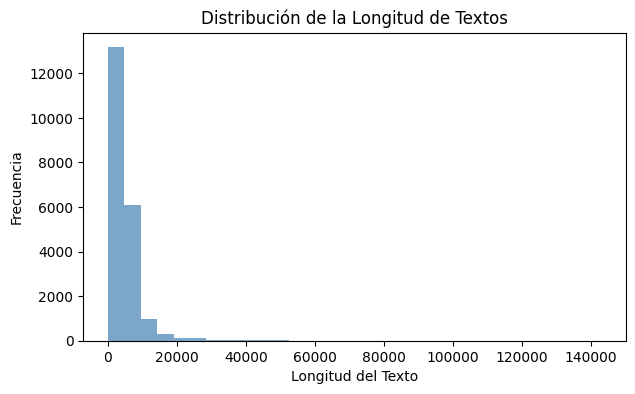

In [174]:
# Crear una nueva columna con la longitud del texto, manejando NaNs
df['text_length'] = df['text'].apply(lambda x: len(x) if type(x) == str else 0)

# Histograma de la longitud del texto
plt.figure(figsize=(7, 4))
plt.hist(df['text_length'], bins=30, color='#4682B4', alpha=0.7)  
plt.title('Distribución de la Longitud de Textos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

#### Gráficos de Barras

Este gráfico nos ayudará a visualizar claramente la diferencia entre la cantidad de noticias falsas y verdaderas en nuestro dataset.

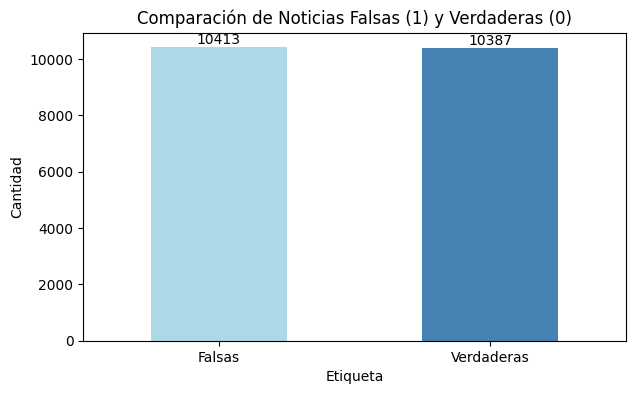

In [175]:
# Contar ocurrencias de cada etiqueta
counts = df['label'].value_counts()

# Crear el gráfico de barras
ax = counts.plot(kind='bar', color=['lightblue', '#4682B4'], figsize=(7, 4))

# Añadir título y etiquetas
plt.title('Comparación de Noticias Falsas (1) y Verdaderas (0)')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Falsas', 'Verdaderas'], rotation=0)

# Anotar cada barra con el valor exacto
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 5, str(int(i.get_height())), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

#### Boxplots

Nos ayudarán a observar la dispersión y detectar valores atípicos en la longitud de los textos, por ejemplo destacamos: 


- Tanto para la etiqueta "0" como para la "1", la caja (que representa desde el primer cuartil (Q1) hasta el tercer cuartil (Q3)) es relativamente pequeña en comparación con el rango total de los datos. Esto indica que la mayoría de los textos en cada grupo tienen longitudes bastante similares.

- La línea horizontal en cada caja, que representa la mediana, se sitúa cerca del extremo inferior de la caja, sugiriendo que la distribución de las longitudes de texto es asimétrica con una cola más larga hacia el extremo superior.

- Hay una cantidad significativa de valores atípicos en ambos grupos, especialmente en la categoría "1". Estos valores representan textos anormalmente largos en comparación con el resto del grupo.

Este boxplot nos es útil para identificar diferencias y similitudes en la distribución de la longitud del texto entre dos categorías ayudándonos a visualizar rápidamente si un grupo tiende a tener textos más largos o más cortos. Además la presencia de valores atípicos puede influir en decisiones sobre cómo preprocesar los datos para análisis posteriores o de nuestro entrenamiento de modelos de machine learning.

<Figure size 1000x600 with 0 Axes>

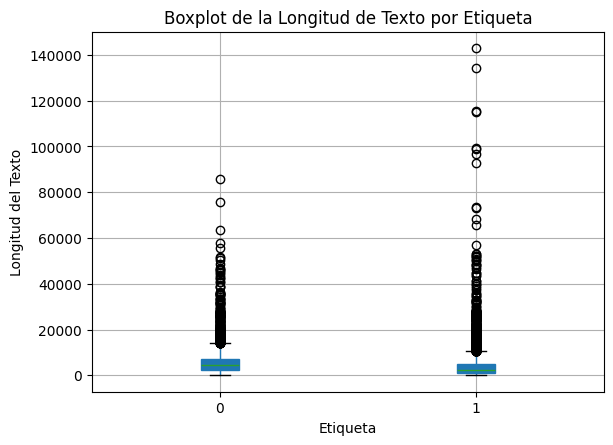

In [176]:
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='text_length', by='label', patch_artist=True)

colors = ['lightblue', 'lightgreen']
for patch, color in zip(boxplot.artists, colors):
    patch.set_facecolor(color)

plt.title('Boxplot de la Longitud de Texto por Etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Longitud del Texto')
plt.suptitle('')
plt.show()

En el siguiente gráfico ajustamos los ejes y ocultamos los outliers para podamos observar y hacer un "zoom" en la representación gráfica de los datos más representativos.

<Figure size 1000x600 with 0 Axes>

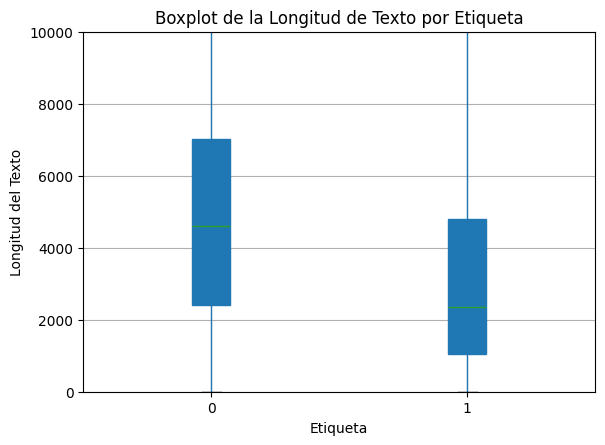

In [177]:
# En el siguiente 
plt.figure(figsize=(10, 6))  # Ajustar el tamaño para mejor visualización
boxplot = df.boxplot(column='text_length', by='label', showfliers=False, patch_artist=True)
plt.title('Boxplot de la Longitud de Texto por Etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Longitud del Texto')
plt.suptitle('')  # Elimina el título automático generado por pandas
plt.ylim(0, 10000)  # Ajustar límites si es necesario

# Colorear cada caja
colors = ['lightblue', 'lightgreen']
for patch, color in zip(boxplot.artists, colors):
    patch.set_facecolor(color)

plt.show()

#### Mapas de Calor

Para visualizar correlaciones entre diferentes variables numéricas y ver si realmente la longitud del texto puede impactar en si la noticia es falsa o no, realizamos un mapa de calor. 

El mapa de calor generado es una representación visual de la matriz de correlación entre dos variables del dataset: la longitud del texto (text_length) y la etiqueta (label).

El valor de correlación es -0.13, nos indica una correlación negativa muy débil entre la longitud del texto y la etiqueta. Esto sugiere que no hay una relación lineal fuerte entre si una noticia es falsa o verdadera y la longitud del texto de la noticia. La débil correlación sugiere que la longitud del texto, por sí sola, no es un indicador fuerte de si una noticia es falsa o verdadera. Esto podría implicar que para tareas de clasificación o análisis, se deberían considerar otras características del texto además de su longitud.

Por lo tanto, en el dsarrollo de nuestros modelos de machine learning vamos a necesitar integrar otras variables o características textuales (como la complejidad del texto, la presencia de ciertas palabras clave, análisis de sentimientos, etc.) para mejorar la capacidad del modelo.

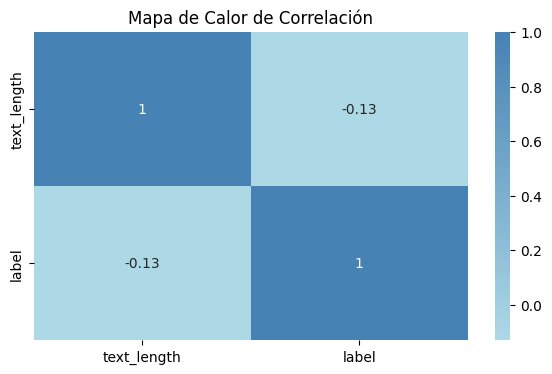

In [178]:
from matplotlib.colors import LinearSegmentedColormap

# Correlaciones
correlation_matrix = df[['text_length', 'label']].corr()

# Crear un mapa de colores personalizado
colors = ["lightblue", "#4682B4"]  # Define los colores
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Mapa de calor
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap)
plt.title('Mapa de Calor de Correlación')
plt.show()

Introducimos en el análisis la el número de palabras pero las conclusiones son idénticas que en el gráfico anterior. 

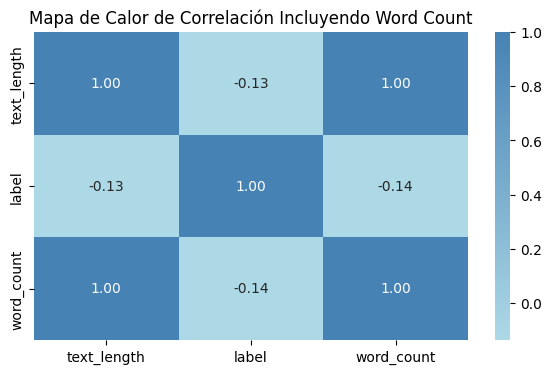

In [179]:
correlation_matrix = df[['text_length', 'label', 'word_count']].corr()
colors = ["lightblue", "#4682B4"]  
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Mapa de calor
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Mapa de Calor de Correlación Incluyendo Word Count')
plt.show()

Por último, para no dejar el dato de los autores de Feak News como meros observadores, realizamos un análisis del TOP de autores en el df, los 20 que más se repiten e informamos gráficamente el promedio de palabras usado en sus noticias, agrupadas por la veracidad o no de las mismas. Observamos como un único autor compagina fake news con noticias. 
El siguiente gráfico representa TOP de los 20 autores con mayor número de noticias falsas.

<Figure size 1400x800 with 0 Axes>

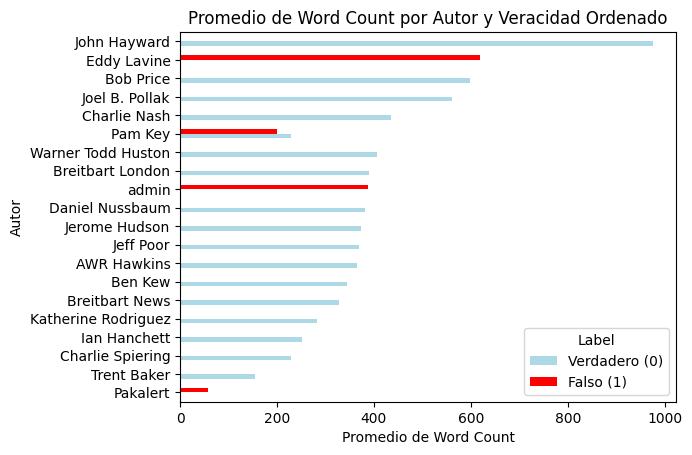

In [180]:
top_authors = df['author'].value_counts().head(20).index
filtered_df = df[df['author'].isin(top_authors)]
author_label_word_counts = filtered_df.groupby(['author', 'label'])['word_count'].mean().unstack()
author_label_word_counts['total'] = author_label_word_counts.sum(axis=1) 
author_label_word_counts = author_label_word_counts.sort_values('total', ascending=True)  
author_label_word_counts.drop('total', axis=1, inplace=True) 
colors = ["lightblue", "#FF0000"] 
plt.figure(figsize=(14, 8))
author_label_word_counts.plot(kind='barh', stacked=False, color=colors)
plt.title('Promedio de Word Count por Autor y Veracidad Ordenado')
plt.xlabel('Promedio de Word Count')
plt.ylabel('Autor')
plt.legend(title='Label', labels=['Verdadero (0)', 'Falso (1)'])
plt.show()

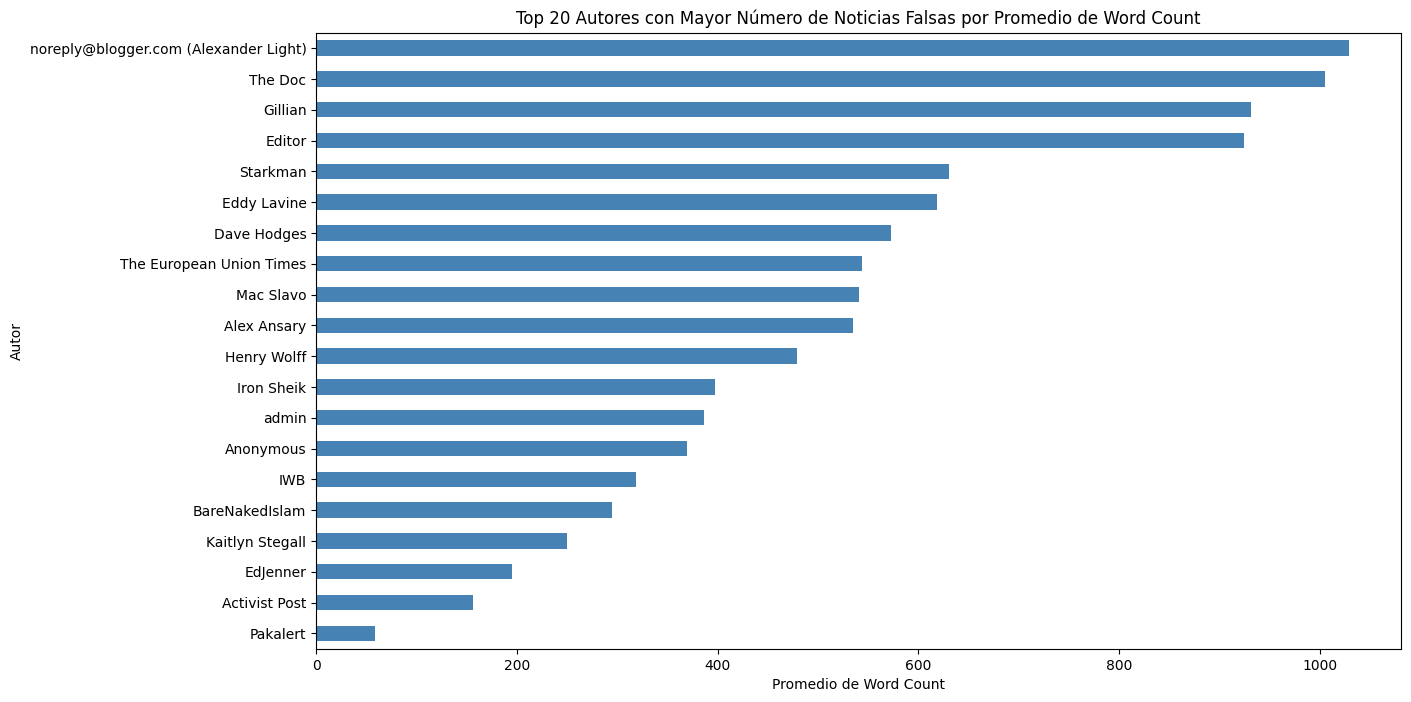

In [181]:
false_news_df = df[df['label'] == 1]
top_false_authors = false_news_df['author'].value_counts().head(20).index
filtered_false_news_df = false_news_df[false_news_df['author'].isin(top_false_authors)]
author_false_word_counts = filtered_false_news_df.groupby('author')['word_count'].mean().sort_values(ascending=False)
colors = ["#4682B4"]  
plt.figure(figsize=(14, 8))
author_false_word_counts.plot(kind='barh', color=colors)
plt.title('Top 20 Autores con Mayor Número de Noticias Falsas por Promedio de Word Count')
plt.xlabel('Promedio de Word Count')
plt.ylabel('Autor')
plt.gca().invert_yaxis() 
plt.show()

#### Duplicados y NaN´s

In [182]:
# Se crea la columna 'texto' con la unión de las columnas 'title' y 'text'. Será la que se emplee para el análisis.
df['text'].fillna('', inplace=True)
df['title'].fillna('', inplace=True)
df['texto'] = df['title'] + ' ' + df['text']

C:\Users\river\AppData\Local\Temp\ipykernel_12368\862031923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text'].fillna('', inplace=True)
C:\Users\river\AppData\Local\Temp\ipykernel_12368\862031923.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

In [183]:
df['texto'].isna().sum()

0

In [184]:
df[df.duplicated("texto")]

,id,title,author,text,label,word_count,text_length,texto
1292,1292,,Anonymous,"Same people all the time , i dont know how you...",1,16,135,"Same people all the time , i dont know how yo..."
1808,1808,,Anonymous,"Same people all the time , i dont know how you...",1,16,135,"Same people all the time , i dont know how yo..."
1974,1974,,Anonymous,"Same people all the time , i dont know how you...",1,16,135,"Same people all the time , i dont know how yo..."
2120,2120,,Enjoykin4,A leading US senator: US Supporting War in Syr...,1,879,5289,A leading US senator: US Supporting War in Sy...
3039,3039,UNAIRED Documentary Illuminati Child Abduction...,Pakalert,Support Us UNAIRED Documentary Illuminati Chil...,1,11,76,UNAIRED Documentary Illuminati Child Abduction...
...,...,...,...,...,...,...,...,...
20632,20632,Social Justice Attorney Andrea Burton: Jailed ...,Bill Quigley,Tweet Widget by Bill Quigley \nA young Black l...,1,2156,12682,Social Justice Attorney Andrea Burton: Jailed ...
20652,20652,Jeddah airport was targeted by Ansar Allah mis...,NaN,Email \n\nAn informed source in Yemen's AnsarA...,1,151,943,Jeddah airport was targeted by Ansar Allah mis...
20728,20728,Trump warns of World War III if Clinton is ele...,NaN,Email Donald Trump warned in an interview Tues...,1,773,4537,Trump warns of World War III if Clinton is ele...
20749,20749,Realities Faced by Black Canadians are a Natio...,Anonymous,"Tweet Widget by Robyn Maynard \nCanada, includ...",1,776,4877,Realities Faced by Black Canadians are a Natio...


In [185]:
# Se eliminan los duplicados y las columnas que no interesan
df = df.drop_duplicates('texto')
df = df.drop(['id', 'title', 'text'], axis=1)
df

,author,label,word_count,text_length,texto
0,Darrell Lucus,1,820,4930,House Dem Aide: We Didn’t Even See Comey’s Let...
1,Daniel J. Flynn,0,710,4160,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Consortiumnews.com,1,1266,7692,Why the Truth Might Get You Fired Why the Trut...
3,Jessica Purkiss,1,557,3237,15 Civilians Killed In Single US Airstrike Hav...
4,Howard Portnoy,1,154,938,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...
20795,Jerome Hudson,0,307,1814,Rapper T.I.: Trump a ’Poster Child For White S...
20796,Benjamin Hoffman,0,1120,6059,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,Michael J. de la Merced and Rachel Abrams,0,801,4799,Macy’s Is Said to Receive Takeover Approach by...
20798,Alex Ansary,1,267,1773,"NATO, Russia To Hold Parallel Exercises In Bal..."


### Procesamiento del texto
A continuación realizamos una serie de pasos para el preprocesamiento de textos en un DataFrame utilizando la biblioteca Natural Language Toolkit (NLTK). Estos pasos son esenciales para la preparación de datos en procesos de NLP (Natural Language Processing) como la clasificación de texto o análisis de sentimientos. Aquí desgloso cada parte del código:

1. Definimos las funciones que se emplean en esta parte del proceso:
- Función limpiar_texto: Convierte todo el texto a minúsculas para homogeneizar la capitalización y el filtrado de caracteres recorre cada carácter del texto, incluyendo solo aquellos que son alfanuméricos o espacios. Esto elimina puntuación y caracteres especiales que podrían afectar el análisis.
- Función tokenizar_eliminar_stopwords: La Tokenización divide el texto en palabras o "tokens" utilizando la función word_tokenize de NLTK y la eliminación de stopwords, filtra los tokens, eliminando aquellos que están en la lista de stopwords.
- Funciones tokens_stemmer y tokens_lemmatizer: Utilizamos el PorterStemmer de NLTK para reducir cada token a su raíz o forma base, lo que ayuda a reducir la variabilidad de las palabras (por ejemplo, "running" a "run") y utilizamos el WordNetLemmatizer para llevar las palabras a su forma lematizada basada en un diccionario (por ejemplo, "better" a "good").
- Funciones para Procesar Texto con Stemmer y Lemmatizer. Aquí, cada texto en la columna df['texto'] es procesado a través de las funciones definidas.

2. Definir las stopwords que se van a emplear en el procesado del texto, para ello:
- Se cargan las del inglés desde NLTK, que son palabras comunes ("the", "is", "in", etc.) que generalmente se eliminan en el análisis de texto porque suelen aportar poco valor semántico y son muy frecuentes.
- Se analizan las palabras que forman la matriz de palabras tras eliminar las Stopwords iniciales y se forma una lista con aquellas que no aportan información (números, símbolos y palabras con menos de 3 letras). Esta lista se añade a las stopwords.
- Finalmente se genera una otra lista con las palabras más usadas que no aportan información para ampliar la lista de stopwords. (se realizan varias pruebas y finalmente se desestima este último paso ya que empeora los resultados)

3. Procesado del texto 
- Primero se limpia, luego se tokeniza y elimina stopwords, y finalmente se aplica stemming o lematización. El resultado de cada paso se almacena en nuevas columnas en el DataFrame para análisis posteriores.
- Este proceso es crucial para que preparemos los datos de texto para la ejecución de los modelos de NLP ya que facilita una mejor interpretación y análisis de modelos de machine learning al reducir la complejidad y aumentar la uniformidad del texto.


#### 1.- Funciones de limpieza y tokenización

In [186]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto_limpio = ""
    for s in texto:
        if s.isalnum() or s.isspace():
            texto_limpio += s
    return texto_limpio

In [187]:
def tokenizar_eliminar_stopwords(texto):
    tokens = nltk.word_tokenize(text = texto)
    tokens = [token for token in tokens if token not in STOPWORDS]
    return tokens

In [188]:
def tokens_stemmer(tokens):   # probar tanto con Stemmer como con Lemmatizer
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)

In [189]:
def tokens_lemmatizer(tokens):   # probar tanto con Stemmer como con Lemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

In [190]:
# Se genera el texto procesado mediante Stemmer
def stemmer(df):
    df['texto_procesado_stem'] = df['texto'].apply(limpiar_texto)
    df['texto_procesado_stem'] = df['texto_procesado_stem'].apply(tokenizar_eliminar_stopwords)
    df['texto_procesado_stem'] = df['texto_procesado_stem'].apply(tokens_stemmer)
    return df

In [191]:
# Se genera el texto procesado mediante Lemmatizer
def lemmatizer(df):
    df['texto_procesado_lem'] = df['texto'].apply(limpiar_texto)
    df['texto_procesado_lem'] = df['texto_procesado_lem'].apply(tokenizar_eliminar_stopwords)
    df['texto_procesado_lem'] = df['texto_procesado_lem'].apply(tokens_lemmatizer)
    return df

#### 2.- STOPWORDS y comprobación de la idoneidad de los datos
En este punto se analiza si las palabras incluidas en la matriz son las adecuadas o sería mejor eliminar alguna.
Se genera una lista con las palabras con carácteres extraños, con los números y con aquellas palabras con menos de 3 letras.
Se incluye esta lista en las stopwords y se repite el proceso de tokenización

In [192]:
STOPWORDS = nltk.corpus.stopwords.words("english")

In [193]:
# Generamos el array de los 8000 tokens que más se repiten

X = df['texto'].apply(limpiar_texto).values
count_vectorizer = CountVectorizer(max_features = 8000)
control = count_vectorizer.fit_transform(X)

Se analiza si las palabras incluidas en la matriz son las adecuadas o sería mejor eliminar alguna, para ello:
- Se ordena el vocabulario que se incluiría en la matriz para su análisis 
- Se genera una lista con las palabras con carácteres extraños, con los números y con aquellas palabras con menos de 3 letras.
- Se incluye esta lista en las stopwords.

In [194]:
vocabulario_ordenado = sorted(count_vectorizer.vocabulary_.items(), key = lambda x : x[0], reverse=True)
vocabulario_ordenado

[('في', 7999),
 ('этом', 7998),
 ('это', 7997),
 ('чтобы', 7996),
 ('что', 7995),
 ('уже', 7994),
 ('том', 7993),
 ('только', 7992),
 ('того', 7991),
 ('то', 7990),
 ('также', 7989),
 ('так', 7988),
 ('сша', 7987),
 ('россии', 7986),
 ('при', 7985),
 ('по', 7984),
 ('очень', 7983),
 ('от', 7982),
 ('они', 7981),
 ('он', 7980),
 ('но', 7979),
 ('не', 7978),
 ('нас', 7977),
 ('на', 7976),
 ('мы', 7975),
 ('которые', 7974),
 ('как', 7973),
 ('их', 7972),
 ('или', 7971),
 ('из', 7970),
 ('за', 7969),
 ('же', 7968),
 ('есть', 7967),
 ('если', 7966),
 ('его', 7965),
 ('до', 7964),
 ('для', 7963),
 ('года', 7962),
 ('вы', 7961),
 ('все', 7960),
 ('было', 7959),
 ('бы', 7958),
 ('будет', 7957),
 ('более', 7956),
 ('zuckerberg', 7955),
 ('zu', 7954),
 ('zoo', 7953),
 ('zones', 7952),
 ('zone', 7951),
 ('zionist', 7950),
 ('zika', 7949),
 ('zero', 7948),
 ('zealand', 7947),
 ('youve', 7946),
 ('youtube', 7945),
 ('youth', 7944),
 ('yourself', 7943),
 ('yours', 7942),
 ('youre', 7941),
 ('your', 

In [195]:
len(STOPWORDS)

179

In [196]:
lista_stopwords = [ item[0] for item in vocabulario_ordenado if item[0] > 'zz' or item[0] < 'aa' or len(item[0])<3]
STOPWORDS = set(STOPWORDS).union(set(lista_stopwords))
len(STOPWORDS)

448

In [197]:
# Analizamos las 100 palabras más repetidas,
# Manualmente se genera una lista de aquellas que no aportan información
# Añadimos esa lista a la de stopwords 

word_counts = pd.DataFrame(control.toarray(), columns=count_vectorizer.get_feature_names_out())
word_counts.drop(columns=STOPWORDS, errors='ignore').sum(axis=0).sort_values(ascending=False).head(100)

said          79914
trump         47428
one           37685
would         37149
new           37021
              ...  
power          7415
found          7338
used           7272
case           7259
washington     7226
Length: 100, dtype: int64

In [198]:
# Tras varias pruebas, se decide no ampliar más la lista de STOPWORDS porque empeoran los resultados obtenidos

'''lista_stopwords_2 =['said','one','would','new','people','time','year','like','also','could','many','even','day','first','say','two','world','get','make','last','way','may','know','going','dont','want','back']
STOPWORDS = set(STOPWORDS).union(set(lista_stopwords_2))
len(STOPWORDS)'''

"lista_stopwords_2 =['said','one','would','new','people','time','year','like','also','could','many','even','day','first','say','two','world','get','make','last','way','may','know','going','dont','want','back']\nSTOPWORDS = set(STOPWORDS).union(set(lista_stopwords_2))\nlen(STOPWORDS)"

#### 3.- Procesado del texto 
En este punto se preparan datos de texto para el modelado de machine learning, utilizando dos métodos diferentes de procesamiento de texto (Stemming y Lemmatization). A continuación, te explicamos cada paso: 

1. Extracción de Características y Etiquetas con Stemmer, verificando los datos y generando la distribución de las etiquetas, normalizada para mostrar proporciones en lugar de conteos absolutos, lo cual es útil para entender si las clases están balanceadas.

2. Se divide el dataset en datos de entrenamiento y de prueba, con el 25% de los datos reservados para prueba. random_state=42 asegura que los resultados sean reproducibles.

3. Vectorizamos convirtiendo el texto en un "bag of words" (bolsa de palabras), limitando a un máximo de 6000 características para evitar dimensiones excesivamente altas.

4. Ordenams el vocabulario generado por el vectorizador por índice.

5. Transformación TF-ID convirtiendo  bag-of-words matrix en una representación TF-IDF, que pondera los términos en función de su importancia en los documentos.

El proceso con lemmatizer sigue los mismos pasos que el stemming, pero usando los textos procesados mediante lematización. Este proceso ayuda a reducir las palabras a su forma base de manera más contextual y precisa que el stemming.

Este código es fundamental para la preparación de datos de texto en aplicaciones de NLP. Al comparar los resultados de stemming y lemmatization, podemos determinar qué técnica de preprocesamiento es más efectiva para nuestro caso. 

In [199]:
# Función para generar el array de los 6000 tokens que más se repiten
def tfidf_tansformation(X_train,X_test):

    count_vectorizer = CountVectorizer(max_features = 6000)

    bag_train = count_vectorizer.fit_transform(X_train)

    bag_test = count_vectorizer.transform(X_test)

    tfidf = TfidfTransformer()

    bag_tfidf_train_stem = tfidf.fit_transform(bag_train).toarray()

    bag_tfidf_test_stem = tfidf.transform(bag_test).toarray()

    return bag_tfidf_train_stem, bag_tfidf_test_stem

In [200]:
# Se procesan los datos mediante Stemmer

df_stem = stemmer(df)
X = df_stem['texto_procesado_stem'].values
y = df_stem['label'].values

# generamos el array de los 6000 tokens que más se repiten con Stemmer
X_train, X_test, y_train_stem, y_test_stem = train_test_split(X, y, test_size = 0.25, random_state = 42)
bag_tfidf_train_stem, bag_tfidf_test_stem = tfidf_tansformation(X_train,X_test)

In [ ]:
# Se procesan los datos mediante Lemmatizer

df_lem = lemmatizer(df)
X = df_lem['texto_procesado_lem'].values
y = df_lem['label'].values

# generamos el array de los 6000 tokens que más se repiten con Lemmatizer
X_train, X_test, y_train_lem, y_test_lem = train_test_split(X, y, test_size = 0.25, random_state = 42)
bag_tfidf_train_lem, bag_tfidf_test_lem = tfidf_tansformation(X_train,X_test)


In [ ]:
count_vectorizer = CountVectorizer(max_features = 6000)
all_words = count_vectorizer.fit_transform(X)
vocabulario_ordenado = sorted(count_vectorizer.vocabulary_.items(), key = lambda x : x[0], reverse=False)
vocabulario_ordenado

[('aaron', 0),
 ('abandon', 1),
 ('abandoned', 2),
 ('abc', 3),
 ('abe', 4),
 ('abedin', 5),
 ('ability', 6),
 ('able', 7),
 ('aboard', 8),
 ('abortion', 9),
 ('abroad', 10),
 ('absence', 11),
 ('absolute', 12),
 ('absolutely', 13),
 ('absurd', 14),
 ('abu', 15),
 ('abuse', 16),
 ('abused', 17),
 ('academic', 18),
 ('academy', 19),
 ('accept', 20),
 ('acceptable', 21),
 ('acceptance', 22),
 ('accepted', 23),
 ('accepting', 24),
 ('access', 25),
 ('accessible', 26),
 ('accident', 27),
 ('accompanied', 28),
 ('accomplish', 29),
 ('accomplished', 30),
 ('accord', 31),
 ('according', 32),
 ('account', 33),
 ('accountability', 34),
 ('accountable', 35),
 ('accounting', 36),
 ('accuracy', 37),
 ('accurate', 38),
 ('accurately', 39),
 ('accusation', 40),
 ('accuse', 41),
 ('accused', 42),
 ('accusing', 43),
 ('achieve', 44),
 ('achieved', 45),
 ('achievement', 46),
 ('acid', 47),
 ('acknowledge', 48),
 ('acknowledged', 49),
 ('acknowledging', 50),
 ('acquire', 51),
 ('acquired', 52),
 ('acqui

En los siguiente gráficos observamos:
- "TOP" de las 50 palabras más usadas
- Las 50 palabras menos usadas
- Un wordcloud con las 1500 palabras más usadas

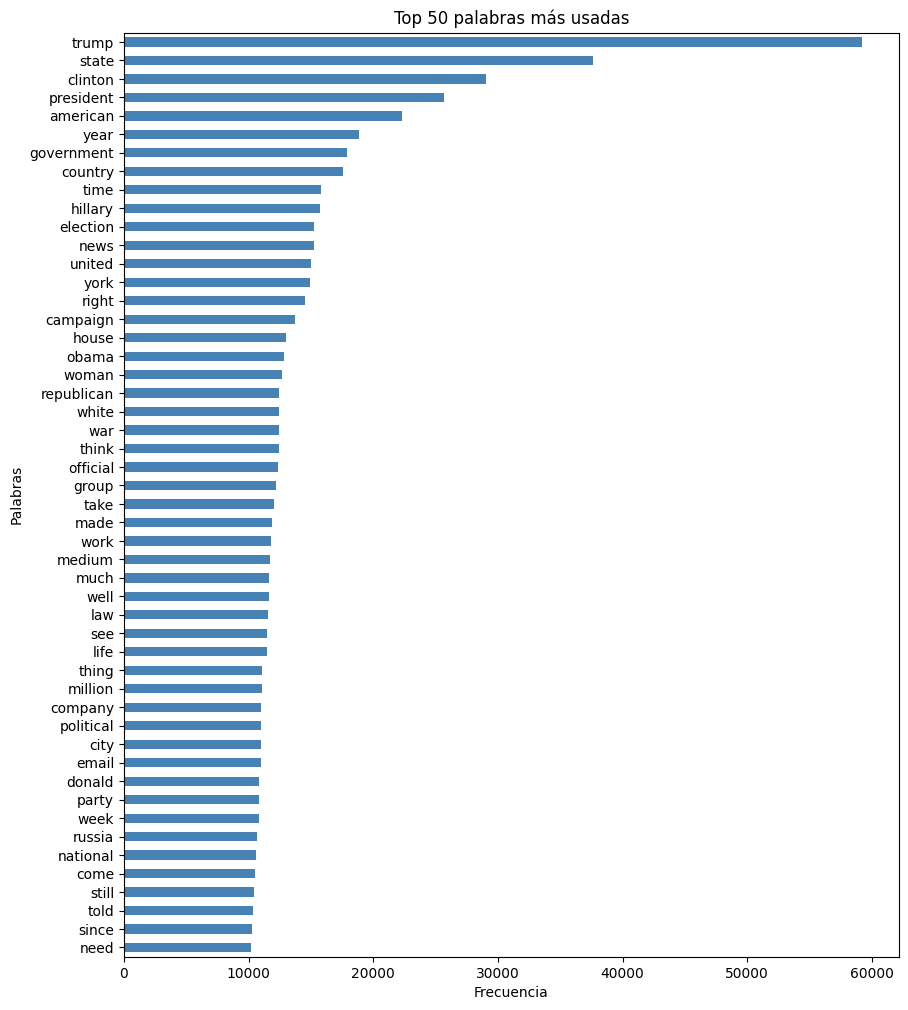

In [ ]:
word_counts = pd.DataFrame(all_words.toarray(), columns=count_vectorizer.get_feature_names_out())
word_totals = word_counts.sum(axis=0).sort_values(ascending=False)
top_50_words = word_totals.head(50)
plt.figure(figsize=(10, 12))
top_50_words.plot(kind='barh', color='#4682B4')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('Top 50 palabras más usadas')
plt.gca().invert_yaxis()  # Invertimos el eje y para que la palabra con mayor frecuencia aparezca arriba
plt.show()

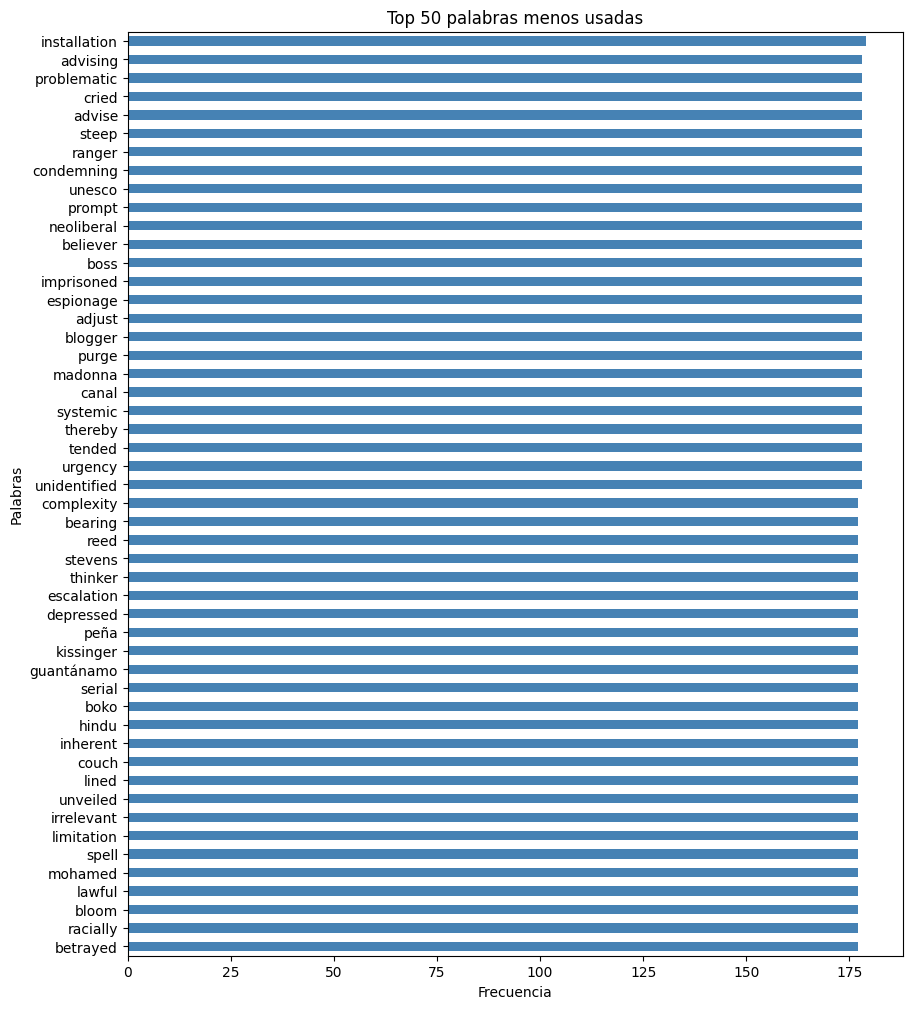

In [ ]:
bot_50_words = word_totals.tail(50)
plt.figure(figsize=(10, 12))
bot_50_words.plot(kind='barh', color='#4682B4')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('Top 50 palabras menos usadas')
plt.gca().invert_yaxis()  # Invertimos el eje y para que la palabra con mayor frecuencia aparezca arriba
plt.show()

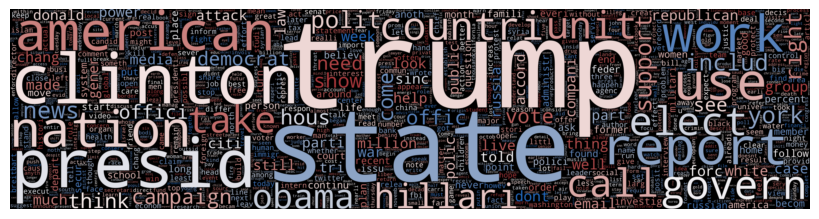

In [ ]:
# Generar worldcloud
from wordcloud import WordCloud
plt.figure(figsize=(8,8))
text = " ".join(X)              
word_cloud = WordCloud(
        max_words=1500,
        width=6000,
        height=1500,
        random_state=42,
        colormap="vlag",
        collocations=False,
        stopwords= STOPWORDS,
        ).generate(text)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# Guarda la imagen como un archivo PNG
plt.savefig('portada.png', bbox_inches='tight', pad_inches=0)

plt.show()

### Modelos

In [ ]:
modelos = [KNeighborsClassifier(),
           # RadiusNeighborsClassifier(),
           NearestCentroid(),
           LogisticRegression(),
           GaussianNB(),
           BernoulliNB(),
           DecisionTreeClassifier(),
           RandomForestClassifier(),
           SVC(),
           AdaBoostClassifier(),
           GradientBoostingClassifier()]


In [ ]:
%%time

datos = list()

for model in tqdm(modelos):
    for suffix in tqdm(['_stem','_lem']):
       
        bag_tfidf_train = globals()['bag_tfidf_train'+suffix]
        bag_tfidf_test = globals()['bag_tfidf_test'+suffix]
        y_test = globals() ['y_test'+suffix]
        y_train = globals() ['y_train'+suffix]

        model.fit(bag_tfidf_train, y_train)
        
        yhat = model.predict(bag_tfidf_test)
        
        jaccard   = jaccard_score(y_test, yhat)
        accuracy  = accuracy_score(y_test, yhat)
        precision = precision_score(y_test, yhat)
        recall    = recall_score(y_test, yhat)
        f1        = f1_score(y_test, yhat)
        roc_auc   = roc_auc_score(y_test, yhat)
        cm        = confusion_matrix(y_test, yhat)    
        
        datos.append([(str(model)+suffix), model, jaccard, accuracy, precision, recall, f1, roc_auc, cm])
    
columnas = ["model_name", "model", "jaccard_index", "accuracy", "precision", "recall", "f1", "roc_auc", "confusion_matrix"]



100%|██████████| 1/1 [00:03<00:00,  3.70s/it]

CPU times: total: 16.7 s
Wall time: 3.7 s


In [ ]:
df_metricas = pd.DataFrame(data    = datos,
                           columns = columnas)
df_metricas = df_metricas.sort_values("accuracy", ascending = False)
df_metricas.to_csv('resultados/df_metricas.csv')

In [ ]:
df_metricas

,model_name,model,jaccard_index,accuracy,precision,recall,f1,roc_auc,confusion_matrix
0,LogisticRegression()_stem,LogisticRegression(),0.893578,0.94394,0.949688,0.937982,0.943798,0.943962,"[[2448, 129], [161, 2435]]"


### GridSearchCV
- Observamos que los resultados obtenidos mediante Stemmer y Lemmatizer son casi idénticos (teniendo Stemmer una ligera mejora en la precisión), por lo que a partir de este punto, para optimizar el código, se utilizarán únicamente los datos alcanzados con el proceso de Stemmer, y descartando los de Lemmatizer.
- Se define en un diccionario los parámetros de cada modelo. 
- Se ejecuta el GridSearchCV para el modelo LogisticRegression. 
- El modelo con mejores resultados es el GradientBoostingClassifier, pero debido al tiempo de computación requerido para ejecutar el GridSearchCV, se ha optado por utilizar LogisticRegression (cuyos resultados diferían de manera ínfima) debido a las limitaciones de tiempo para el trabajo hacían el GBC muy complicado con el que operar.

In [ ]:
# Empleamos los datos obtenidos mediante Stemmer que son los que mejores resultados ofrecen en el modelo LogisticRegression 
bag_tfidf_train = bag_tfidf_train_stem
bag_tfidf_test = bag_tfidf_test_stem
y_test = y_test_stem
y_train = y_train_stem

In [ ]:
modelos = {    LogisticRegression():    {
                                        'penalty'      : ['l1', 'l2', 'elasticnet', 'None'],
                                        'dual'         : [False, True],
                                        'solver'       : ['lbfgs', 'newton-cholesky'],
                                        "multi_class" : ['auto', 'ball_tree', 'kd_tree', 'brute']
                                   }  
              # GradientBoostingClassifier(): {
                #                        'n_estimators'  :  [80, 100, 150],
                 #                       'learning_rate' :  [0.1, 0.15]
                  #                 }
                                   }

In [ ]:
'''modelos = { 
    KNeighborsClassifier() : {
                                        "n_neighbors"  : [1+2*i for i in range(40)],
                                        "algorithm"    : ['auto', 'ball_tree', 'kd_tree', 'brute']
                                        },
        
           NearestCentroid() :      {
                                        "metric"  : ['euclidean'],
                                        },
           LogisticRegression():    {
                                        'penalty' : ['l1', 'l2', 'elasticnet', 'None'],
                                        'dual' : [False, True],
                                        'solver': ['lbfgs', 'newton-cholesky'],
                                        'n_jobs'  : [-1],
                                        "multi_class"    : ['auto', 'ball_tree', 'kd_tree', 'brute']
                                        },
           GaussianNB() : {
                                        'priors' : ['None']
                                        },
           DecisionTreeClassifier(): {
                                        'criterion'         : ["gini", "entropy"],
                                        'splitter'          : ["best", "random"],
                                        'max_depth'         : [2*i for i in range (3,40,2)],
                                        'min_samples_split' : [j for j in range (2,11)],
                                        'max_features'      : ["sqrt", "log2", None],
                                        'random_state'      : 42,
                                        'max_leaf_nodes'    : 10
                                        },
           RandomForestClassifier(): {
                                        "n_estimators"           : [100, 150, 200], # Numero de arboles
                                        "criterion"              : ["gini", "entropy"], # Es la función para medir la calidad de una división/split.
                                        "max_depth"              : range(12, 25, 3), # La profundidad máxima del árbol.
                                        "max_features"           : ["sqrt", "log2", None], # El número de características (atributos) a considerar en cada split
                                        "max_leaf_nodes"         : range(90, 151, 10), # Maximo de nodos hoja del arbol
                                        "min_impurity_decrease"  : [0.0, 0.1, 0.2, 0.3], # Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
                                        "min_samples_split"      : [2, 10, 15, 20], # El número mínimo de muestras requeridas para llegar a nodo hoja.
                                        "random_state"           : [42]
                                        },
           SVC():                   {
                                        "kernel": ['linear', 'poly', 'rbf'],
                                        "C": [0.5, 1, 2],
                                        "random_state":[42]
                                        },
           AdaBoostClassifier() : {
                                        "n_estimators"   : [i*25 for i in range(2, 8)],
                                        'algorithm' : ['SAMME', 'SAMME.R']
                                        },
           GradientBoostingClassifier(): {
                                        'n_estimators'  :  [100, 150, 200, 250, 300],
                                        'learning_rate' :  [0.05, 0.1, 0.15],
                                        'max_depth'     :  [2,3,4],
                                        'subsample'     :  [0.5, 1]                                     
                                   }
                                   }'''

'modelos = { \n    KNeighborsClassifier() : {\n                                        "n_neighbors"  : [1+2*i for i in range(40)],\n                                        "algorithm"    : [\'auto\', \'ball_tree\', \'kd_tree\', \'brute\']\n                                        },\n        \n           NearestCentroid() :      {\n                                        "metric"  : [\'euclidean\'],\n                                        },\n           LogisticRegression():    {\n                                        \'penalty\' : [\'l1\', \'l2\', \'elasticnet\', \'None\'],\n                                        \'dual\' : [False, True],\n                                        \'solver\': [\'lbfgs\', \'newton-cholesky\'],\n                                        \'n_jobs\'  : [-1],\n                                        "multi_class"    : [\'auto\', \'ball_tree\', \'kd_tree\', \'brute\']\n                                        },\n           GaussianNB() : {\n                

In [ ]:
%%time

datos = list()

for model, params in tqdm(modelos.items()):
    
    scorers = ["f1_macro", "accuracy", "recall_macro", "roc_auc"]
    grid_solver = GridSearchCV(estimator  = model, 
                       param_grid = params    , 
                       scoring    = scorers   ,
                       cv         = 5         ,
                       refit      = "accuracy" 
                       )
    model_result = grid_solver.fit(bag_tfidf_train, y_train)
    model_result.best_estimator_.get_params()
    
    yhat = model_result.best_estimator_.predict(bag_tfidf_test)
    
    jaccard   = jaccard_score(y_test, yhat, average = "macro")
    accuracy  = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat, average = "macro")
    recall    = recall_score(y_test, yhat, average = "macro")
    f1        = f1_score(y_test, yhat, average = "macro")
    roc_auc   = roc_auc_score(y_test, yhat)
    cm        = confusion_matrix(y_test, yhat)    
    params_top= model_result.best_estimator_.get_params()
    
    datos.append([model, params_top, jaccard, accuracy, precision, recall, f1, roc_auc, cm])
    
columnas = ["model", 'params_top', "jaccard_index", "accuracy", "precision", "recall", "f1", "roc_auc", "confusion_matrix"]

  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\river\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
310 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\river\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\river\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

CPU times: total: 17min 39s
Wall time: 4min 5s


In [ ]:
df_metricas_top = pd.DataFrame(data    = datos,
                           columns = columnas)
df_metricas_top = df_metricas_top.sort_values("accuracy", ascending = False)
df_metricas_top.to_csv('resultados/df_metricas_top.csv')

In [ ]:
df_metricas_top

,model,params_top,jaccard_index,accuracy,precision,recall,f1,roc_auc,confusion_matrix
0,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",0.894871,0.94452,0.944517,0.944533,0.944519,0.944533,"[[2434, 137], [150, 2452]]"


In [ ]:
### Gráficos de comprobación (ver en resumenes 5.4)

### Validación
- Hold-Out
- Leave One Out
- k-Fold Cross Validation (el de mayor importancia)
- Stratified k-Fold

In [ ]:
XX = np.concatenate ([bag_tfidf_train, bag_tfidf_test],axis=0)
yy = np.concatenate([y_train,y_test], axis=0)

In [ ]:
modelos = df_metricas_top['model'].tolist()
params_top = df_metricas_top['params_top'].tolist()

In [ ]:
df_metricas_top

,model,params_top,jaccard_index,accuracy,precision,recall,f1,roc_auc,confusion_matrix
0,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",0.894871,0.94452,0.944517,0.944533,0.944519,0.944533,"[[2434, 137], [150, 2452]]"


#### Hold-Out

  0%|          | 0/100 [00:00<?, ?it/s]100%|██████████| 100/100 [04:53<00:00,  2.93s/it]


Min de Accuracy:LogisticRegression() 0.934912195907846
Media de Accuracy: LogisticRegression() 0.9432850008055422
Max de Accuracy: LogisticRegression() 0.9500563879490898
CPU times: total: 22min 7s
Wall time: 4min 54s


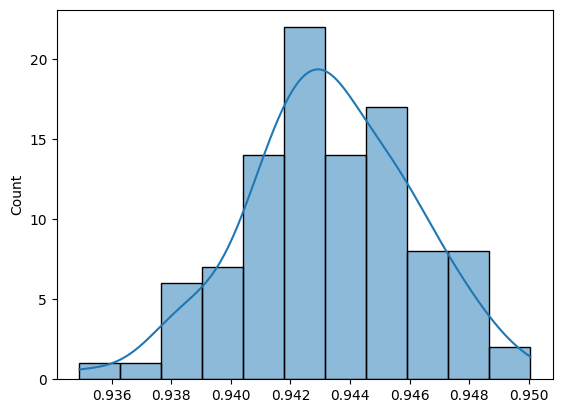

In [ ]:
%%time

lista_acc = list()
for modelo,param in zip (modelos,params_top):
    model = modelo.__class__(**param)
    for i in tqdm(range(100)):
    
        X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size = 0.3)
    
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        
        # print("Accuracy:", accuracy_score(y_test, yhat))
        lista_acc.append(accuracy_score(y_test, yhat))
    
    # stratify separa el y_train y y_test para que tengan la misma proporcion de clases

    print(f"Min de Accuracy:{modelo} {np.array(lista_acc).min()}")
    print(f"Media de Accuracy: {modelo} {np.array(lista_acc).mean()}")
    print(f"Max de Accuracy: {modelo} {np.array(lista_acc).max()}")

    # graficamos
    import seaborn as sns
    sns.histplot(x = lista_acc, kde = True)

#### Leave One Out

In [ ]:
%%time

loo = LeaveOneOut()


# EL for va a realizar 150 iteraciones porque es un total de 150 patrones
for modelo,param in zip (modelos,params_top):
    yhat = list()
    model = modelo.__class__(**param)
    i = 0
    for train_index, test_index in tqdm(loo.split(XX)):
        
        X_train, X_test = XX[train_index], XX[test_index]
        y_train, y_test = yy[train_index], yy[test_index]
        
        # Modelo
        model.fit(X_train, y_train)
        
        # Prediccion
        yhat1 = model.predict(X_test)
        yhat.append(yhat1)
        
        i += 1
        if i>2000:
            break

    print("Accuracy:",modelo, accuracy_score(yy[:2001], yhat))

2000it [2:18:11,  4.15s/it]


Accuracy: LogisticRegression() 0.9525237381309345
CPU times: total: 11h 29min 42s
Wall time: 2h 18min 11s


#### k-Fold Cross Validation

In [ ]:
%%time

kfold = KFold(n_splits = 5)
yhat = list()

for modelo,param in  zip (modelos,params_top):
    yhat = list()
    model = modelo.__class__(**param)
# El for va a realizar 5 iteraciones porque estamos haciendo 5 cortes diferentes
    for train_index, test_index in tqdm( kfold.split(XX)): 
        X_train, X_test = XX[train_index], XX[test_index]
        y_train, y_test = yy[train_index], yy[test_index]

        # Modelo        
        model.fit(X_train, y_train)

        # Predicción
        yhat1 = model.predict(X_test)
        yhat.extend(yhat1)
            
    print("Accuracy:",modelo, accuracy_score(yy, yhat))

5it [00:17,  3.56s/it]

Accuracy: LogisticRegression() 0.9454809086515225
CPU times: total: 58.9 s
Wall time: 17.8 s


#### Stratified k-Fold

In [ ]:
%%time

skfold = StratifiedKFold(n_splits = 50)

for modelo,param in tqdm (zip (modelos,params_top)):
    y_test_real, yhat = list(), list()
    model = modelo.__class__(**param)
    # EL for va a realizar 5 iteraciones porque estamos haciendo 5 cortes diferentes.
    for train_index, test_index in tqdm(skfold.split(XX, yy)): 
        X_train, X_test = XX[train_index], XX[test_index]
        y_train, y_test = yy[train_index], yy[test_index]
        
        # Modelo
        model.fit(X_train, y_train)
        
        # Prediccion
        yhat1 = model.predict(X_test)
        yhat.extend(yhat1)    
    
        # Valores reales
        y_test_real.extend(y_test)

    print("Accuracy:",modelo, accuracy_score(y_test_real, yhat))

50it [03:03,  3.66s/it]
1it [03:03, 183.07s/it]

Accuracy: LogisticRegression() 0.9483808603189947
CPU times: total: 15min
Wall time: 3min 3s


### Guardado/Carga de Variables

In [ ]:
# Guardado de variables (evitar tener que ejecutar todo el código al abrir el notebook)

import pickle
# Función para comprobar si un objeto es serializable
def is_picklable(obj):
    try:
        pickle.dumps(obj)
    except (pickle.PicklingError, TypeError, AttributeError):
        return False
    return True

# Filtrar las variables serializables
variables_serializables = {name: value for name, value in globals().items() if is_picklable(value)}

# Guardar las variables en un archivo
with open('variables.pkl', 'wb') as f:
    pickle.dump(variables_serializables, f)

In [ ]:
'''# Cargar las variables desde el archivo
with open('variables.pkl', 'rb') as f:
    variables_cargadas = pickle.load(f)

# Restaurar las variables en el entorno global
globals().update(variables_cargadas)'''

"# Cargar las variables desde el archivo\nwith open('variables.pkl', 'rb') as f:\n    variables_cargadas = pickle.load(f)\n\n# Restaurar las variables en el entorno global\nglobals().update(variables_cargadas)"

### Modelo Predictivo

A continuación, usaremos los datos procesados para entrenar un modelo que pueda realizar predicciones sobre si las noticias son reales o fakes y usaremos el dataset que hemos procesado previamente para poder observar el rendimiento del modelo y su porcentaje de acierto o error.

In [ ]:
# X = df['texto_procesado_lem'].values
# Debido a la superioridad del modelo Stemmer (por pequeña que sea),utilizaremos como modelo base, 
# dejando abierta la posibilidad de utilizar Lemmatizer, si así se desease
X = df['texto_procesado_stem'].values
y = df['label'].values 

In [ ]:
# Separamos los datos para el entrenamiento y testeo del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Usamos Count_Vectorizer sobre los datos de entrenamiento
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)

# Transformamos a TF-IDF para poder entrenar el modelo y hacer predicciones
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
# Inicializamos el modelo de Regresión Logística para predecir la probabilidad de que una noticia sea real o fake
model = LogisticRegression()
# Ajustamos el modelo a los datos previamente pasados por Count_Vectorizer y TF-IDF
model.fit(X_train_tfidf, y_train)

In [ ]:
# Transformamos los datos de testeo y realizamos predicciones
X_test_counts = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = model.predict(X_test_tfidf)

# Observamos la performance del modelo de testeo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

In [ ]:
# Hacemos predicciones para el dataset entero
X_counts = count_vectorizer.transform(X)
X_tfidf = tfidf_transformer.transform(X_counts)
y_pred_proba_dataset = model.predict_proba(X_tfidf)

# Definimos las predicciones y las categorías reales
predict_labels = model.predict(X_tfidf)
actual_labels = y

# Calculamos la precisión del modelo
accuracy = accuracy_score(predict_labels, actual_labels)
print(f"Precisión: {accuracy:.2f}")

# Hacemos un conteo de las predicciones correctas e incorrectas
num_correct = np.sum(predict_labels == actual_labels)
num_incorrect = np.sum(predict_labels != actual_labels)
print(f"Número de predicciones correctas: {num_correct}")
print(f"Número de predicciones incorrectas: {num_incorrect}")

# Comparamos las probabilidades predichas con las categorías reales
predicted_fake_probs = []
for i, (predicted_prob, actual_label) in enumerate(zip(y_pred_proba_dataset, actual_labels)):
    predicted_prob_fake = predicted_prob[1]  # Probabilidad de que sea falsa
    predicted_fake_probs.append(predicted_prob_fake)  # Añadir a predicted_fake_probs para calcular media y desv. est.
    predicted_category = np.argmax(predicted_prob)  # Predicción de categoría en base a la probabilidad estimada
    prediction = "Correcta" if predicted_category == actual_label else "Incorrecta"
    print(f"Artículo {i + 1}: Probabilidad predicha de que un artículo sea falso: {predicted_prob_fake:.2f}, Categoría Real: {'Fake' if actual_label == 1 else 'Real'}, Predicción: {prediction}")

In [ ]:
# Calcular media y desviación estándar.
mu = np.mean(predicted_fake_probs)
std = np.std(predicted_fake_probs)

# Histograma de las probabilidades predichas
plt.hist(predicted_fake_probs, bins=20, density=True, alpha=0.6, color='blue', edgecolor='black', linewidth=1, label='Histograma.')

# Dibujar la distribución de Gauss
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Campana de Gauss (Mean={mu:.2f}, Std={std:.2f})')
plt.xlabel('Probabilidad predicha de que un artículo sea falso.')
plt.ylabel('Densidad.')
plt.title('Histograma y distribución de Gauss de las probabilidades predichas (Stemmer).')
plt.legend()
plt.show()

Gracias al histograma presentado, se puede observar como la mayor densidad de probabilidades se concentra en los extremos, lo que indica que el modelo suele establecer con una certeza muy elevada si la noticia es real o fake. Esto se puede ver al analizar más detenidamente los resultados anteriores, y es que si uno observa, la cantidad de veces que el modelo predice algo alrededor del 10% está alrededor de los 2000 resultados, mientras que cuando se haya alrededor del 50%, este numero baja a 400. Esto nos indica la certeza con la que el modelo predice algo y, con una precisión del 95%, está claro que esa certeza está justificada. No obstante, consideramos que es importante recalcar que estos resultados son del modelo reaccionando al mismo dataset que ha servido para entrenarlo, por lo que debemos observar como actúa el modelo al analizar información nueva.

### Aplicación práctica

#### URL

In [ ]:
# Definimos una función para scrapear un artículo
def scrapear_articulo(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  
        soup = BeautifulSoup(response.text, 'html.parser')
        texto_articulo = ' '.join([p.text for p in soup.find_all('p')])
        return texto_articulo
    except requests.RequestException as e:
        print("Error al scrapear el artículo:", e)
        return None

In [ ]:
# Definimos una función para preprocesar el texto de la noticia que escojamos
def preprocesar_texto(texto):
    texto = texto.lower()
    texto_limpio = ''.join([c if c.isalnum() or c.isspace() else ' ' for c in texto])
    tokens = nltk.word_tokenize(texto_limpio)
    tokens = [token for token in tokens if token not in STOPWORDS]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    texto_preprocesado = ' '.join(tokens)
    return texto_preprocesado

In [ ]:
# Función para predecir si un artículo es real o fake
def predecir_articulo(texto_articulo, count_vectorizer, tfidf_transformer, model):
    try:
        texto_articulo_preprocesado = preprocesar_texto(texto_articulo)
        X_counts = count_vectorizer.transform([texto_articulo_preprocesado])
        X_tfidf = tfidf_transformer.transform(X_counts)
        pred_prob = model.predict_proba(X_tfidf)
        pred_cat = model.predict(X_tfidf)
        return pred_cat[0], pred_prob[0]
    except Exception as e:
        print("Error al predecir el artículo:", e)
        return None, None

In [ ]:
# Artículo España
# articulo_esp = 'https://elpais.com/espana/2024-05-17/pedro-sanchez-descarta-un-gobierno-de-puigdemont-en-cataluna-no-le-dan-los-numeros.html'
# Artículo USA
# articulo_usa = 'https://www.theguardian.com/us-news/article/2024/may/17/biden-trump-debates'

# Escogemos un artículo aleatorio de la prodecencia que elijamos
url_articulo = ''
texto_articulo = scrapear_articulo(url_articulo)

# Predecimos si el artículo es real o fake, y obtenemos las probabilidades predichas por el modelo ya entrenado
if texto_articulo:
    pred_cat, pred_prob = predecir_articulo(texto_articulo, count_vectorizer, tfidf_transformer, model)
    if pred_cat is not None and pred_prob is not None:
        if pred_cat == 0:
            print("El modelo predice que la noticia es real.")
        else:
            print("El modelo predice que la noticia es fake.")
        print("Probabilidad de ser real:", pred_prob[0])
        print("Probabilidad de ser fake:", pred_prob[1])
else:
    print("Error al scrapear el artículo. Revise la URL.")

Al trabajar con un dataset cuyas noticias parecen provenir en gran medida de Estados Unidos, se ha observado una tendencia del modelo a estimar que noticias de otra procedencia (habla hispana, por ejemplo) son fakes con mayor frecuencia y con una certeza en la predicción mayor que las de EE.UU. Esto resalta claramente una limitación del modelo entrenado debido a la homogeneidad de idioma/procedencia de los datos contenidos en el dataset. Si se contase con mayor tiempo, se podría desarrollar un modelo más efectivo, para lo cual habría que entrenarlo con datos que tuviesen una mayor variabilidad en esos aspectos en comparación con los que se han trabajado. 

#### Nuevo dataset

In [ ]:
# Cargar datos del nuevo dataset y representarlos
df_2 = pd.read_csv("dataset_compare.csv")
df_2

In [ ]:
# Comprobamos que los datos están balanceados
df_2['label'].value_counts(normalize=True)

In [ ]:
# Quitamos duplicados en la columna Text
df_2 = df_2.drop_duplicates('Text')

# Quitamos celdas vacías en ambas columnas
df_2 = df_2.dropna(subset=['Text', 'label'])

# Reemplazamos 'Real' con 0 y 'Fake' con 1
df_2['label'] = df_2['label'].replace({'Real': 0, 'Fake': 1})

In [ ]:
# Preprocesamos el nuevo dataset
df_2['texto_procesado'] = df_2['Text'].apply(preprocesar_texto)

# Transformamos el dataset usando CountVectorizer and TfidfTransformer
X_counts_2 = count_vectorizer.transform(df_2['texto_procesado'])
X_tfidf_2 = tfidf_transformer.transform(X_counts_2)

# Hacemos las predicciones y obtenemos las categorías reales
y_pred_2 = model.predict(X_tfidf_2)
y_true_2 = df_2['label'].values

# Evaluamos el dataset
pred_correctas = (y_pred_2 == y_true_2).sum()
pred_incorrectas = len(y_true_2) - pred_correctas
accuracy = accuracy_score(y_true_2, y_pred_2)
conf_matrix = confusion_matrix(y_true_2, y_pred_2)
# Debido a 'Real' siendo 0 y 'Fake' siendo 1, transponemos la matriz, lo que nos otorga
# 4360 como Verdaderos Positivos, 1741 como Falsos Positivos
# 505 como Falsos Negativos, 3259 como Verdaderos Negativos
conf_matrix_corrected = conf_matrix.T
target_names = ['Real = 0', 'Fake = 1']
class_report = classification_report(y_true_2, y_pred_2, target_names=target_names)
print(f"Número de predicciones correctas: {pred_correctas}")
print(f"Número de predicciones incorrectas: {pred_incorrectas}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix_corrected}")
print(f"Classification Report:\n{class_report}")

Al presentar al modelo con datos nuevos y no vistos previamente, podemos observar que la precisión a la hora de categorizar las noticias sufre una caída con respecto al análisis del dataset original, aunque se mantiene en valores elevados, siendo casi de un 80%. La matriz de confusión también nos informa de que el aspecto con el que más errores comete el modelo es categorizar de real una noticia que en verdad es fake. Si bien esto se puede atribuir a que el modelo carece del refinamiento y la calidad que se le podría haber otorgado con una mayor cantidad de tiempo, con datasets más variados (factores que, por desgracia, escapan a nuestro control)... también plantea una realidad preocupante: que es difícil distinguir de una noticia real de una falsa, lo que puede conducir a alguien a replantearse la veracidad de la información que se consume en el día a día (que no es poca).

In [ ]:
##################################################